In [9]:
# Imports
import random

import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from IPython.display import display
from torch.utils.data import DataLoader, TensorDataset

In [14]:

def cross_entropy_loss(x, labels):
  """
  Helper function to compute cross entropy loss

  Args:
    x: torch.tensor
      Model predictions we'd like to evaluate using labels
    labels: torch.tensor
      Ground truth

  Returns:
    avg_loss: float
      Average of the loss vector
  """
  x_of_labels = torch.zeros(len(labels))
  # 1. Prediction for each class corresponding to the label
  for i, label in enumerate(labels):
    x_of_labels[i] = x[i, label]
  # 2. Loss vector for the batch
  losses = -x_of_labels + torch.log(torch.sum(torch.exp(x), axis=1))
  # 3. Return the average of the loss vector
  avg_loss = losses.mean()

  return avg_loss



labels = torch.tensor([0, 1])
x = torch.tensor([[10.0, 1.0, -1.0, -20.0],  # Correctly classified
                  [10.0, 10.0, 2.0, -10.0]])  # Not correctly classified
CE = nn.CrossEntropyLoss()
pytorch_loss = CE(x, labels).item()
## Uncomment below to test your function
our_loss = cross_entropy_loss(x, labels).item()
print(f'Our CE loss: {our_loss:0.8f}, Pytorch CE loss: {pytorch_loss:0.8f}')
print(f'Difference: {np.abs(our_loss - pytorch_loss):0.8f}')

Our CE loss: 0.34672737, Pytorch CE loss: 0.34672749
Difference: 0.00000012


## Spiral Classification Dataset



Random seed 2021 has been set.


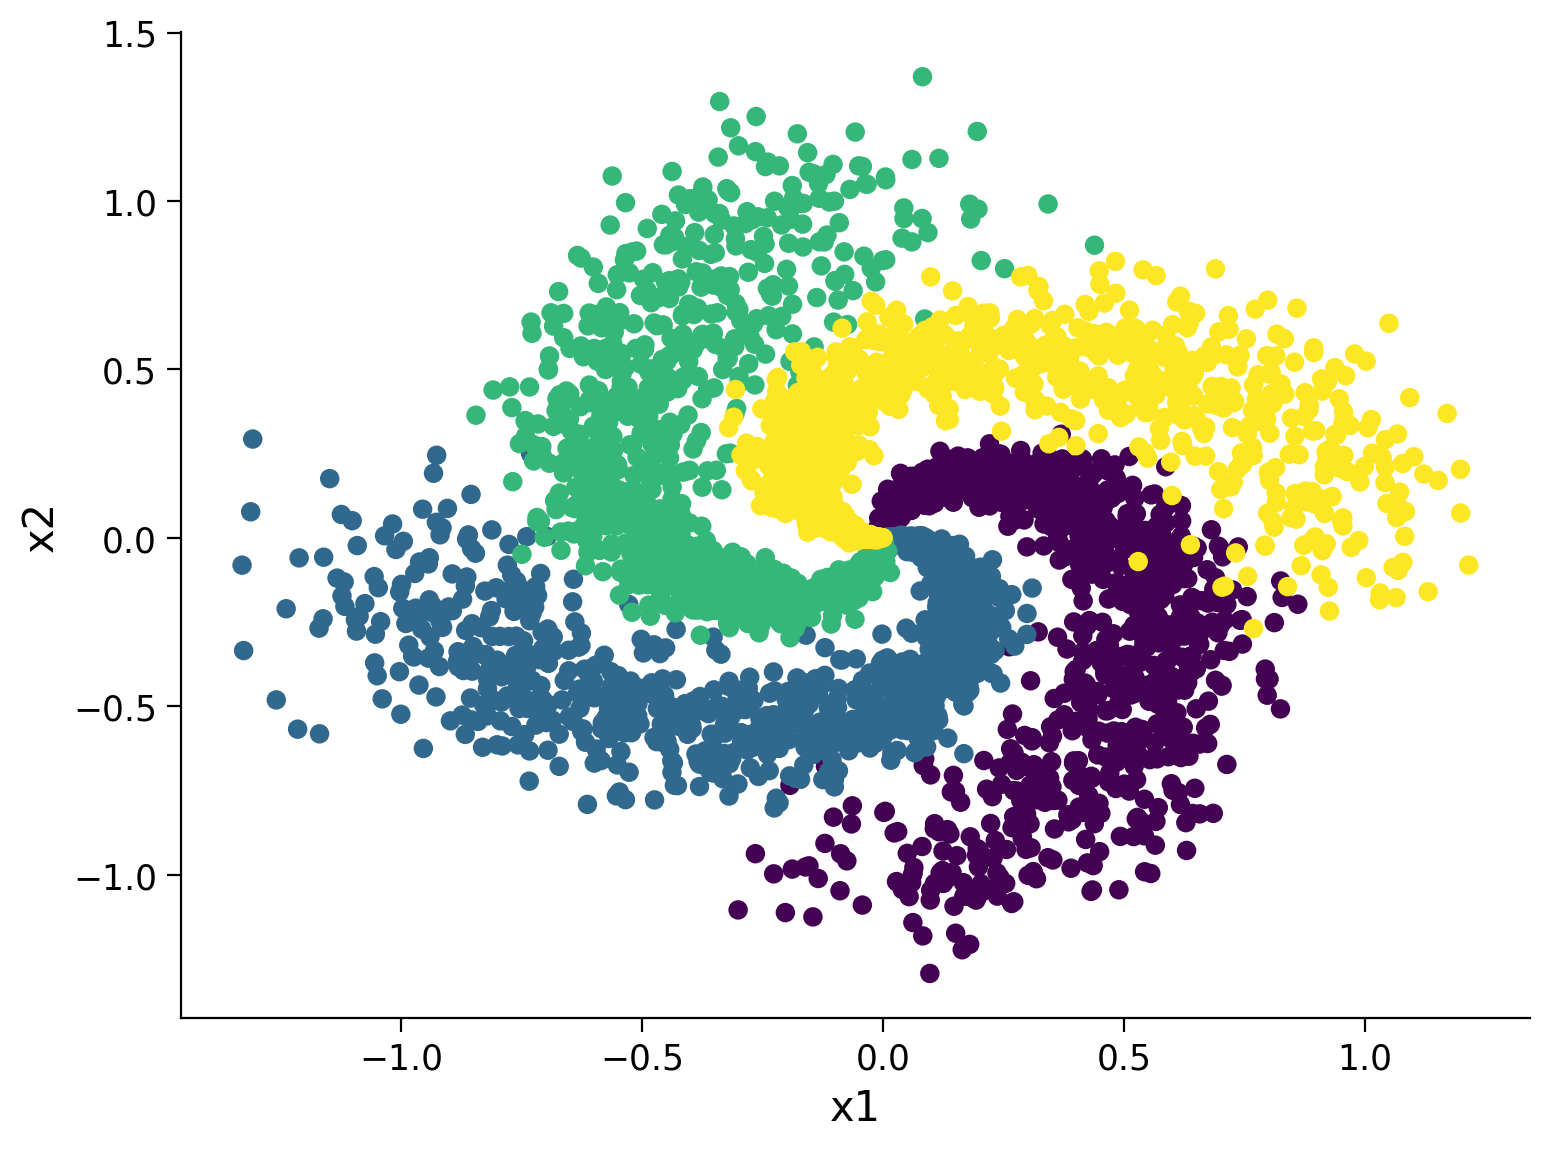

In [15]:
def create_spiral_dataset(K, sigma, N):
  """
  Function to simulate spiral dataset

  Args:
    K: int
      Number of classes
    sigma: float
      Standard deviation
    N: int
      Number of data points

  Returns:
    X: torch.tensor
      Spiral data
    y: torch.tensor
      Corresponding ground truth
  """

  # Initialize t, X, y
  t = torch.linspace(0, 1, N)
  X = torch.zeros(K*N, 2)
  y = torch.zeros(K*N)

  # Create data
  for k in range(K):
    X[k*N:(k+1)*N, 0] = t*(torch.sin(2*np.pi/K*(2*t+k)) + sigma*torch.randn(N))
    X[k*N:(k+1)*N, 1] = t*(torch.cos(2*np.pi/K*(2*t+k)) + sigma*torch.randn(N))
    y[k*N:(k+1)*N] = k

  return X, y


# Set parameters
K = 4
sigma = 0.16
N = 1000

set_seed(seed=SEED)
X, y = create_spiral_dataset(K, sigma, N)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()